In [2]:
import numpy as np
import gym
import navstack_gym
import matplotlib.pyplot as plt
from nav_sim_modules import MAP_OBS_VAL, MAP_PASS_VAL, MAP_UNK_VAL

In [4]:
env = gym.make('TreasureChestRoom-v0', path_turnable=np.pi/8, avoidance_size=3, move_limit=-1, path_planning_count=10, path_exploration_count=4000)

In [5]:
obs = env.reset(is_generate_pose=True)

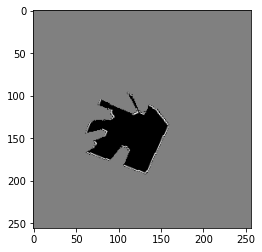

In [6]:
obs[obs==-1] = 50
plt.imshow(obs, cmap='gray')

In [7]:
env.step(env.action_space.sample())

(array([[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]]),
 0,
 False,
 [])

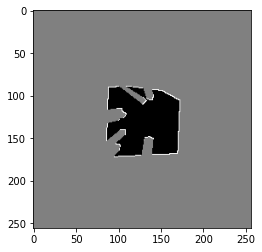

In [8]:
trueth = np.copy(env.actioner.navs.mapper.occupancy_map)
trueth[trueth==-1] = 50
plt.imshow(trueth, cmap='gray')

In [9]:
N = 10

In [10]:
heat = np.zeros_like(env.observation_space.sample())
for i in range(N):
    obs = env.reset(is_generate_room=False)
    # heat += (env.scener.env_pixel == MAP_PASS_VAL) / N
    heat += (env.actioner.occupancy_map == MAP_PASS_VAL) / N
    # heat += (obs == MAP_OBS_VAL) / N

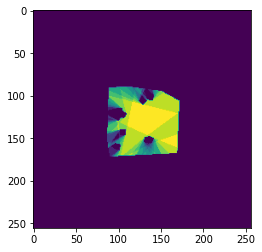

In [11]:
plt.imshow(heat)

/home/tagokeniot/hypo_workspace/hypo-gym/.venv/lib/python3.8/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/home/tagokeniot/hypo_workspace/hypo-gym/.venv/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/tagokeniot/hypo_workspace/hypo-gym/.venv/lib/python3.8/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]
/home/tagokeniot/hypo_workspace/hypo-gym/navstack_gym/base.py:156: UserWarning: 

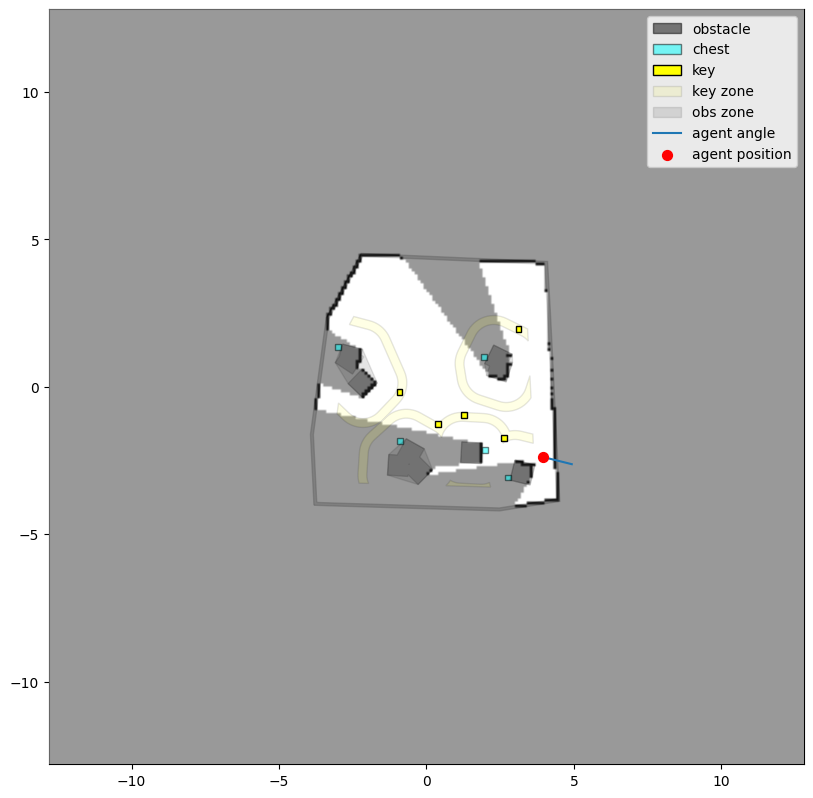

In [12]:
env.render()